# World Happiness Report

In [40]:
# Importing all the necessary packages/libraries

import warnings
warnings.simplefilter("ignore")
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# EDA (Exploratory Data Analysis)

In [4]:
df.shape

(158, 12)

The shape method gives us the total number of rows to be 158 and total number of columns as 12.

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Again with the use of isnull method I am just cross verifying to ensure we do not have any missing values in our data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Here the info function shows us the column names and the data types. I see that there are 2 columns with object data type, 1 column with integer data type and remaining columns as float data type.

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Using the describe function we are able to ignore the categorical columns and get an insight on the numerical data such as the total count, the mean of those column data, standard deviation, minimum-maximum range and the inter quantile data.

In [9]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

I have used the columns method to extract the names of all columns that will help me in dropping specific columns that I do not need such as the categorical columns and therefore would like to drop it. Also I see that the Happiness Rank is just a list of numbers which is not going to provide any kind of useful contribution to the Happiness score.

# Dropping columns that are not contributing towards my label prediction

In [10]:
df_new = df.drop(['Country', 'Region', 'Happiness Rank'], axis=1) # Creating after removing useless columns


Here I have successfully removed the categorical columns 'Country' and 'Region' along with the 'Happiness Rank' which was just a list of sequential numeric data.

# Visualizing the data

Using an upper traingular Heatmap

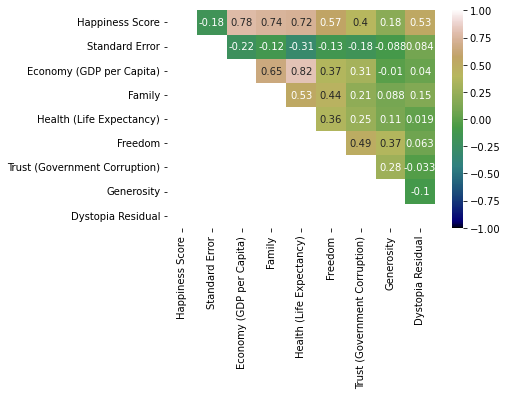

In [11]:
upper_triangle = np.tril(df_new.corr())
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True,
            annot_kws={'size':10}, cmap="gist_earth", mask=upper_triangle)
plt.show()

From this heatmap we are able to check the correlation between Happiness Score which is our label with all other feature columns showing that each one of them have something to contribute. There are no dark boxes visible proving that none of the columns are useless and that each of them have something to contribute be it a high or low value.

# Using a Pairplot

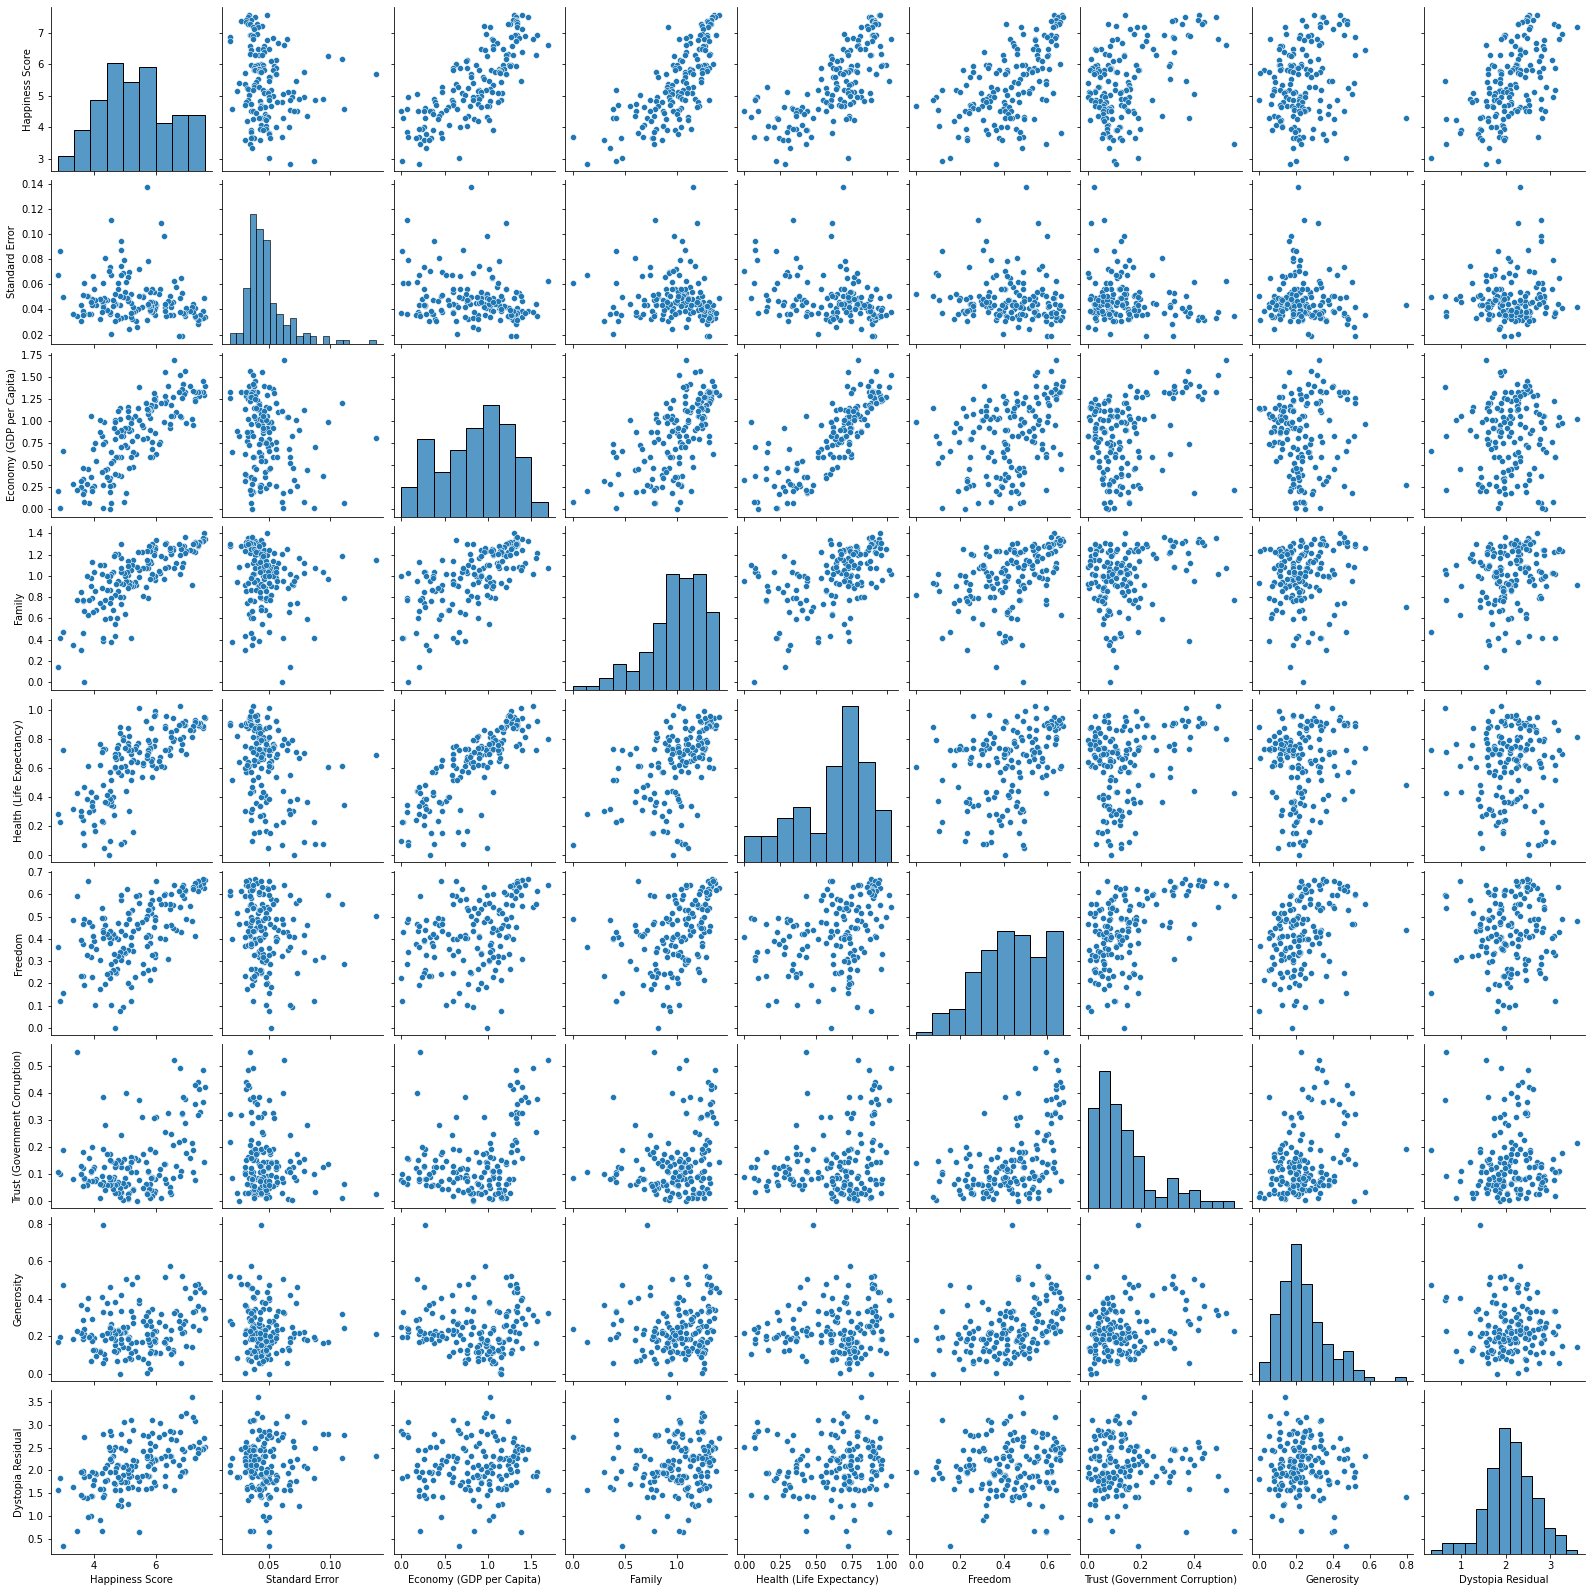

In [12]:
sns.pairplot(df_new)
plt.show()

# Using a Histogram

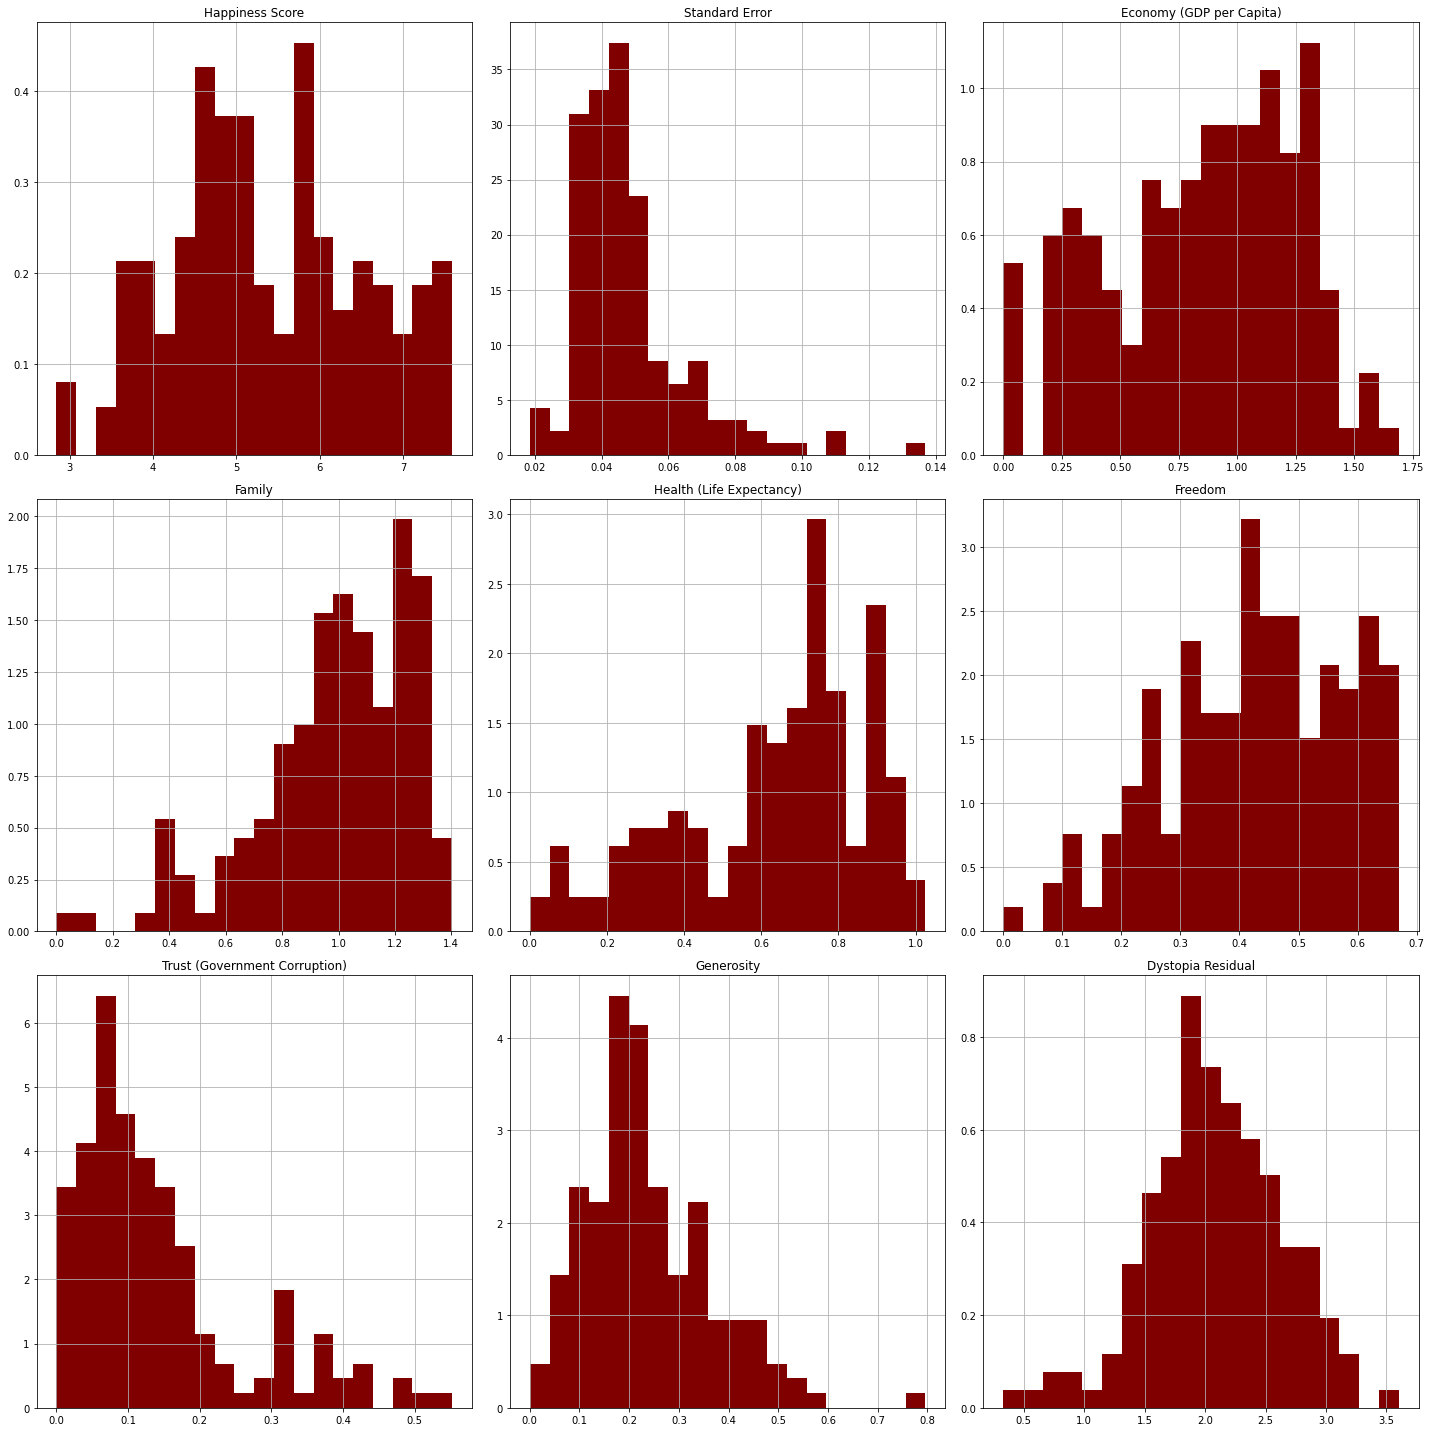

In [14]:
plt.rcParams['figure.figsize'] = (20,20)
df_new.hist(bins=20, color='maroon', density=True, label='Value', histtype='bar')
plt.tight_layout()
plt.show()

Taking a look at the above Histogram I can see that there are columns with skewness and are not normally distributed. But I will confirm the same using the skew function on the data set.

In [15]:
df_new.skew() # Checking the skewness of coulmns where acceptable range is between -0.5 to 0.5

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

So with the help of skew method we see columns that are off from the acceptable rangle of -0.5 to 0.5. This indicates that we have outliers present in our data set that will need to be treated.

# Outlier removal

Acceptable range for skewness is +/-0.5

The feature columns that have skewness are Standard Error, Freedom, Generosity and Dystopia Residual.

Since we already tried retaining the outliers earlier to build our regression models it did not give us proper score therefore attempting again to clean the data by removing the outliers and then will check the model accuracy.

In [18]:
# Z score method
from scipy.stats import zscore
z=np.abs(zscore(df_new))
threshold=3
np.where(z>3)

df_new1=df_new[(z<3).all(axis=1)]
df_new1 # Creating after removing the outliers

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


With the help of Z Score method we are able to detect the outliers and have removed them from our data set.

In [19]:
# Percentage of Data Loss

data_loss=(158-149)/158*100 # 158 was the number of rows in original data set and 149 after the removal of outliers
data_loss

5.69620253164557

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set after removing the outliers.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [21]:
X = df_new1.drop('Happiness Score', axis=1) # List of all features
Y = df_new1['Happiness Score'] # Data of our label

Here we have simply seperated our new data set into label and features for further processing.

In [22]:
X # Displaying the content of X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [23]:
Y # Displaying the content of Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

It clearly shows on the above 2 cells that the feature and label data have been separated successfully using the new data set of 149 rows each

# Scaling

In [25]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Using the 'yeo-johnson' method as 'box-cox' can be used only on positive data. With the help of Power Transformation our outliers should be handled too. Since we do not have much data I am trying not to lose any rows by removing outliers right now. However if needed to increase the accuracy of our model I may perform outlier removal later on.

Comments: We have now removed the outliers to check how the models perform post 5 percent data loss.

In [26]:
X_scaled # Displayed the feature values after applying the Power Transformer Scaler

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


We see that in the scaled feature format there are positive and negative values in it. And as mentioned if the outliers affect the machine learning models then I will go ahead and remove them else trying my best to retain them.

Comments: I have removed the outliers and suffered a 5 percent data loss in hopes of improving the model accuracy.

# Creating the training and testing data sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.75, random_state=42, shuffle=True)

I am taking 75 percent of the total data present in the dataset for training purpose and the remaining 25 percent will be used in testing purpose during model building process.

In [36]:
# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
linear_model = LinearRegression()
svr_model = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtr_model = DecisionTreeRegressor(criterion="poisson", random_state=111)
rfr_model = RandomForestRegressor(max_depth=2, max_features="sqrt")
knr_model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

I have made use of 5 regression algorithms namely linear regression, support vector regression, decision tree regressor, random forest regressor and k neighbors regressor. Used the sklearn page to use the correct parameters for each of the models.

In [37]:
# Training the models

linear_model.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)
dtr_model.fit(X_train, Y_train)
rfr_model.fit(X_train, Y_train)
knr_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

Now I have trained all my regression models by feeding them with training data sets to ensure they are aware of the pattern that will be required for further predictions.

In [38]:
# Predictions

pred_linear = linear_model.predict(X_test)
pred_svr = svr_model.predict(X_test)
pred_dtr = dtr_model.predict(X_test)
pred_rfr = rfr_model.predict(X_test)
pred_knr = knr_model.predict(X_test)

Once the models are trained I am now predicting the label by providing the unseen test features and storing the values in a predicted variable.

# Evaluation metrics

In [41]:
# RMSE - a lower RMSE is better than a higher one


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

mse_linear = mean_squared_error(Y_test, pred_linear)
mse_svr = mean_squared_error(Y_test, pred_svr)
mse_dtr = mean_squared_error(Y_test, pred_dtr)
mse_rfr = mean_squared_error(Y_test, pred_rfr)
mse_knr = mean_squared_error(Y_test, pred_knr)

rmse_linear = sqrt(mse_linear)
rmse_svr = sqrt(mse_svr)
rmse_dtr = sqrt(mse_dtr)
rmse_rfr = sqrt(mse_rfr)
rmse_knr = sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.06638458610380164
RMSE of Support Vector Regression is:  0.4302095934215033
RMSE of Decision Tree Regressor is:  0.6827919656974976
RMSE of Random Forest Regressor is:  0.6011200692842417
RMSE of K Neighbors Regressor is:  0.34579756208997253


I have used RMSE to check the difference between the actual label and the predicted label for the test features that were provided to the models. The RMSE metrics is basically the root mean squared error and it is always better to have a lower RMSE than a higher one.

In [42]:
# R2 Score for the models

print(f"R2 Score for Linear Regression is: ", r2_score(Y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(Y_test, pred_svr, multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor is: ", r2_score(Y_test, pred_dtr, multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor is: ", r2_score(Y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(Y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  99.61289492395045
R2 Score for Support Vector Regression is:  83.7424707579807
R2 Score for Decision Tree Regressor is:  59.04837243238613
R2 Score for Random Forest Regressor is:  68.25927677943578
R2 Score for K Neighbors Regressor is:  89.49639897867345


Using the R2 score to evaluate the models and check the accuracy by which we should be able to choose our best regression model.

Inference: Comparing the RMSE score and the R2 score I see that Linear Regression has the lowest RMSE score and highest R2 score making it the best model amongst all 5 of the models.

# Hyper parameter tuning on the best ML Model

In [43]:
# Linear Regression

lt_param = {'fit_intercept' : [True,False], 'normalize' : [True,False], 
            'copy_X' : [True,False], 'n_jobs' : [1,2,3,4,5,6,7,8,9,10], 'positive' : [True,False]}

I have listed down all the paramteres available for Linear Regression Model and saved it in the variable lt_param.

In [44]:
RSCV = RandomizedSearchCV(LinearRegression(), lt_param, cv=5)

Here I have used the Randomized Search Cross Validatio to look for the best parameters that I can feed in my model.

In [45]:
RSCV.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'normalize': [True, False],
                                        'positive': [True, False]})

Used the Randomized Search CV technique on my training data to check through all the premutations and combinations of the parameters possible on Linear Regression model.

In [46]:
RSCV.best_params_

{'positive': True,
 'normalize': False,
 'n_jobs': 4,
 'fit_intercept': True,
 'copy_X': False}

With the help of the best_params_ option we were able to identify the most fitted paramter list that can be used in our Final model.

In [47]:
Final_Model = LinearRegression(positive=True, normalize=True, n_jobs=10, fit_intercept=True, copy_X=True)
Classifier = Final_Model.fit(X_train, Y_train)
lr_pred = Final_Model.predict(X_test)
lr_r2_score = r2_score(Y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 99.34437553896682


By using the hyper parameter tuning we were able to get the optimal R2 score value for our Final Model.

# Saving the model (using pickle or joblib)

In [48]:
filename = 'FinalModel_2.pkl'
pickle.dump(Final_Model, open(filename, 'wb'))

We can save our final model with the help of pickle or joblib but I am using the pickle method to save my model now.

# Loading the model

In [49]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)*100
print(result)


99.34437553896682


Finally I have loaded the saved model and passed the unseen data set to predict the model score.